<a href="https://colab.research.google.com/github/Shivabairy005/Machine-Learning-Lab/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

shivabairy_best_hp_path = kagglehub.dataset_download('shivabairy/best-hp')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
file_path = "/kaggle/input/best-hp/hp_train (1).csv"
df = pd.read_csv(file_path)
df2 = pd.get_dummies(df)

In [ ]:
"SalePrice" in df2.columns

True

In [ ]:
X = df2.drop('SalePrice' , axis = 1)
Y = df2['SalePrice']

x_train , x_test , y_train , y_test = train_test_split(
    X,
    Y,
    test_size = 0.2,
    random_state = 42
)

y_train = np.array(y_train).reshape(-1, 1)
y_test  = np.array(y_test).reshape(-1, 1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
def gradient_descent(X, y, alpha, epochs):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))
    cost_history = []

    for _ in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (1/m) * X.T.dot(error)
        theta -= alpha * gradients
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

    return theta, cost_history

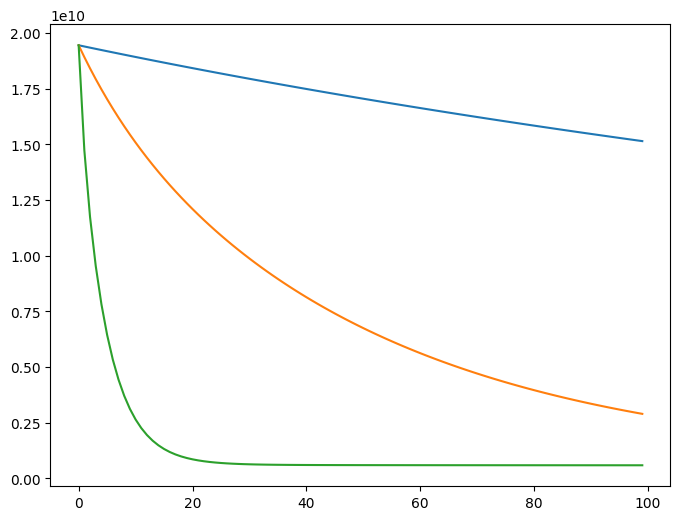

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
epochs = 100

plt.figure(figsize=(8,6))

for alpha in learning_rates:
    theta, cost_history = gradient_descent(X_train, y_train, alpha, epochs)
    plt.plot(range(epochs), cost_history, label=f"alpha={alpha}")

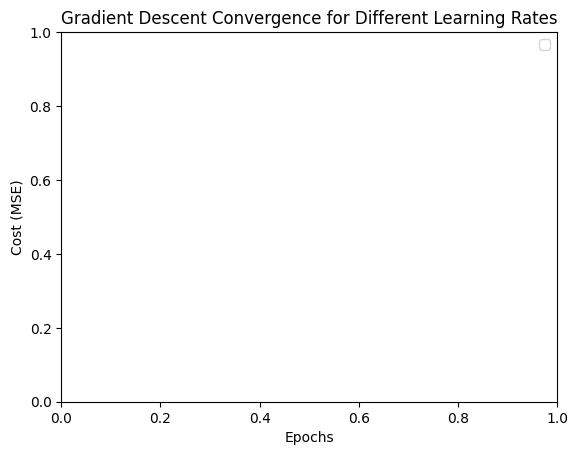

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence for Different Learning Rates")
plt.legend()
plt.show()

In [ ]:
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 5 + 2 * X - 0.5 * X**2 + np.random.normal(0, 4, size=(100,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_pred_lin = lin_reg.predict(X_test_poly)

mse_lin = mean_squared_error(y_test, y_pred_lin)

ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49067e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.234e+02, tolerance: 8.474e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("----- Coefficient Values -----")
print("Linear Regression Coeffs:", lin_reg.coef_)
print("Ridge Regression Coeffs:", ridge.coef_)
print("Lasso Regression Coeffs:", lasso.coef_)

print("\n----- Mean Squared Error (MSE) -----")
print("Linear Regression MSE:", mse_lin)
print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)

----- Coefficient Values -----
Linear Regression Coeffs: [[ 0.00000000e+00  6.08826726e+01 -1.33563058e+02  1.23959761e+02
  -6.17752518e+01  1.83347326e+01 -3.39449380e+00  3.95322002e-01
  -2.81159041e-02  1.11404566e-03 -1.88139850e-05]]
Ridge Regression Coeffs: [[ 0.00000000e+00 -4.31657719e-01 -4.25086718e-01 -4.89381661e-02
   2.32826382e-01 -1.39895514e-01  4.50814743e-02 -8.75167030e-03
   9.93724550e-04 -6.01060899e-05  1.48935876e-06]]
Lasso Regression Coeffs: [ 0.00000000e+00 -3.54927362e-01 -0.00000000e+00  1.15705019e-03
 -4.12245865e-03 -1.27511803e-04  8.45962443e-06  1.39956945e-06
  9.62908950e-08  8.90942111e-10 -8.61875685e-10]

----- Mean Squared Error (MSE) -----
Linear Regression MSE: 13.076526622048565
Ridge Regression MSE: 10.215281799411681
Lasso Regression MSE: 9.503992653778274


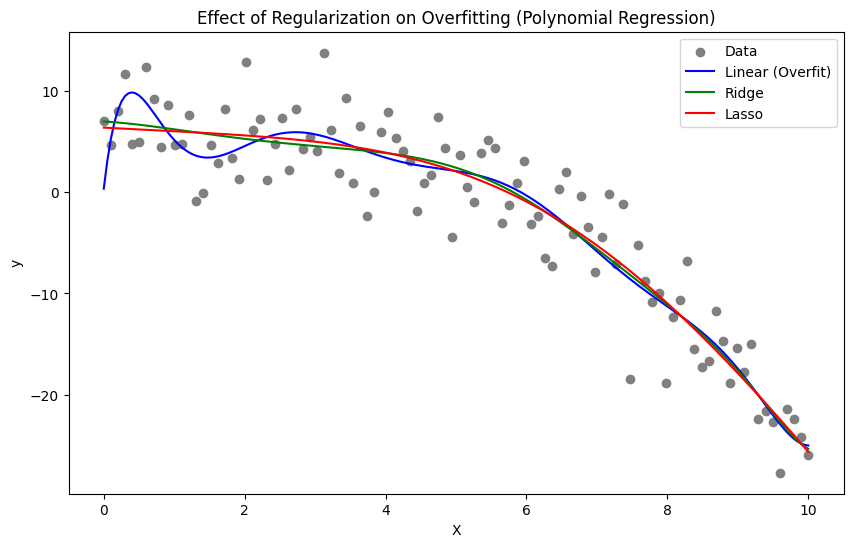

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="gray", label="Data")

X_range = np.linspace(0, 10, 200).reshape(-1,1)
X_range_poly = poly.transform(X_range)

plt.plot(X_range, lin_reg.predict(X_range_poly), color="blue", label="Linear (Overfit)")
plt.plot(X_range, ridge.predict(X_range_poly), color="green", label="Ridge")
plt.plot(X_range, lasso.predict(X_range_poly), color="red", label="Lasso")

plt.title("Effect of Regularization on Overfitting (Polynomial Regression)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()